## Bar charts 直方圖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

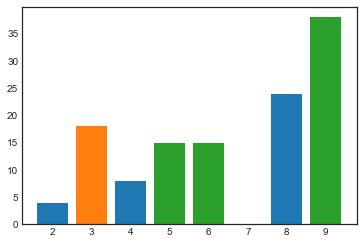

In [2]:
import numpy as np
import pandas as pd

plt.bar([2,4,8],[4,8,24])   #x1,y1
plt.bar([3,6,9],[18,15,38]) #x2,y2
plt.bar([5,6,9],[15,15,38]) #x3,y3
plt.show()

<AxesSubplot:>

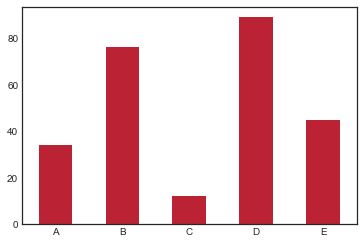

In [3]:
data = pd.Series([34,76,12,89,45], index= list('ABCDE'))  #Series   

data.plot.bar ()
data.plot.bar (rot = 0, color = 'r', alpha = 0.7 ) 
#data.plot.barh(color = 'g', alpha = 0.7 )

## Histogram 直方分佈圖

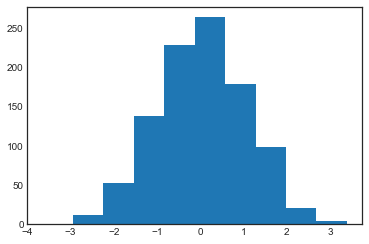

In [4]:
data = np.random.randn(1000)
plt.hist(data);

> The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

`hist()`函數有很多的參數可以用來調整運算和展示；下面又一個更加個性化的直方圖展示：

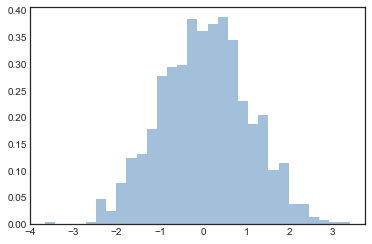

In [5]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue', edgecolor='none');

> The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

`plt.hist`文檔中有更多關於個性化參數的信息。作者發現聯合使用`histtype='stepfilled'`和`alpha`參數設置透明度在對不同分佈的數據集進行比較展示時很有用：

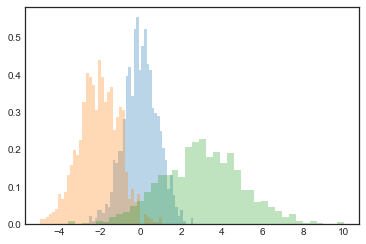

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

> If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

如果你只是需要計算直方圖的數值（即每個桶的數據點數量）而不是展示圖像，`np.histogram()`函數可以完成這個目標：

In [7]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 13 191 493 278  25]


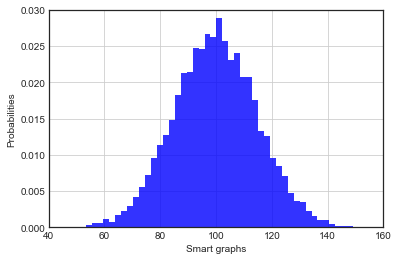

In [8]:
mu=100
sigma=15
x=mu+sigma*np.random.randn(10000)

n,bins,patches=plt.hist(x,50,density=True, facecolor='blue',alpha=0.80)

plt.xlabel('Smart graphs')
plt.ylabel('Probabilities')
plt.axis([40,160,0,0.03])
plt.grid(True)

plt.show()

(array([  3.,   8.,   8.,  12.,  34.,  56.,  59., 109.,  95., 110., 122.,
        110.,  81.,  64.,  62.,  30.,  18.,  14.,   0.,   5.]),
 array([-2.93918301, -2.64581213, -2.35244125, -2.05907036, -1.76569948,
        -1.4723286 , -1.17895772, -0.88558683, -0.59221595, -0.29884507,
        -0.00547418,  0.2878967 ,  0.58126758,  0.87463846,  1.16800935,
         1.46138023,  1.75475111,  2.048122  ,  2.34149288,  2.63486376,
         2.92823464]),
 <BarContainer object of 20 artists>)

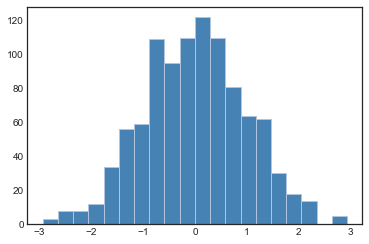

In [9]:
x = np.random.randn(1000)
fig = plt.figure()


plt.hist(x, 
         bins=20, color='SteelBlue', edgecolor="LightSteelBlue")  

#bins 定義有幾個直方圖 color->直方圖顏色 edgecolor->邊界顏色

counts: [  3   8   8  12  34  56  59 109  95 110 122 110  81  64  62  30  18  14
   0   5]
bin_edges: [-2.93918301 -2.64581213 -2.35244125 -2.05907036 -1.76569948 -1.4723286
 -1.17895772 -0.88558683 -0.59221595 -0.29884507 -0.00547418  0.2878967
  0.58126758  0.87463846  1.16800935  1.46138023  1.75475111  2.048122
  2.34149288  2.63486376  2.92823464]


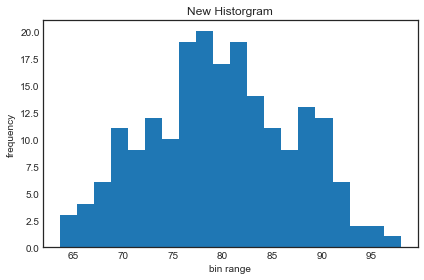

In [10]:
counts, bin_edges = np.histogram(x, bins=20)
print('counts:', counts)
print('bin_edges:', bin_edges)

mu = 80
sigma = 7
x = np.random.normal(mu, sigma, size=200)

fig, ax = plt.subplots()

ax.hist(x, 20)
ax.set_title("New Historgram")
ax.set_xlabel('bin range')
ax.set_ylabel('frequency')

fig.tight_layout()
plt.show()

## Histogram Stack 直方堆疊圖

In [11]:
frame1 = pd.read_csv('input/plt-data.csv')
frame1.head()

,year,gender,income
0,2015,female,55
1,2015,male,65
2,2016,female,67
3,2016,male,69
4,2017,female,55


To create stacked bar plot, we add the argument **stacked = True**:

<AxesSubplot:>

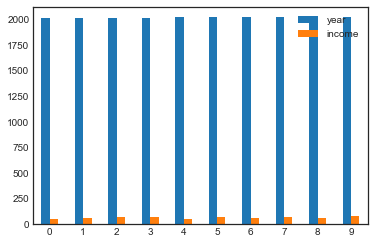

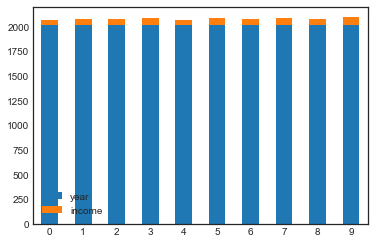

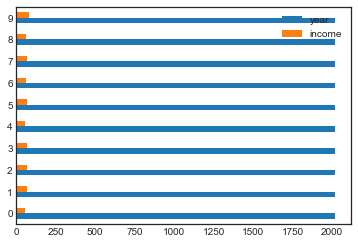

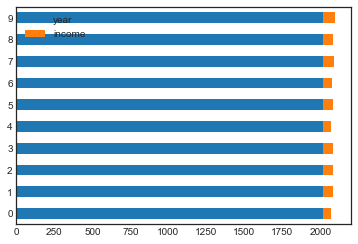

In [12]:
frame1.plot(kind = 'bar', rot =0)
frame1.plot.bar(stacked = True, rot =0)  #stacked 堆積

frame1.plot.barh()
frame1.plot.barh(stacked = True)

### ``plt.hist2d``: Two-dimensional histogram

### `plt.hist2d`：二維直方圖

> One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function: We'll take a brief look at several ways to do this here. We'll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution:

繪製二維直方圖最直接的方法是使用Matplotlib的`plt.hist2d`函數：本節我們介紹幾種實現的方法。首先定義數據集，從多元高斯分佈中獲得x和y數組：

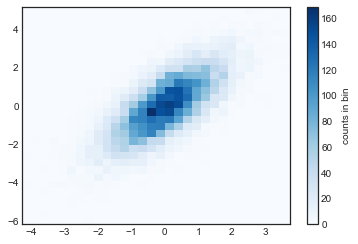

In [13]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### ``plt.hexbin``: Hexagonal binnings

### ``plt.hexbin`：六角形分桶

> The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

剛才的二維分桶是沿著坐標軸將每個桶分為正方形。另一個很自然的分桶形狀就是正六邊形。對於這個需求，Matplotlib提供了`plt.hexbin`函數，它也是在二維平面上分桶展示，不過每個桶（即圖表上的每個數據格）將會是六邊形：

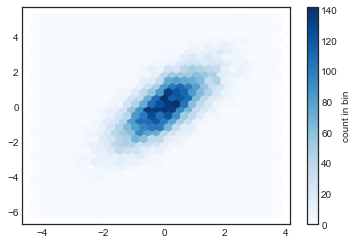

In [14]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation 核密度估計

> Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now we'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

另外一個常用來統計多維數據密度的工具是*核密度估計*（KDE）。這部分內容將在[深入：核密度估計](05.13-Kernel-Density-Estimation.ipynb)一節中詳細介紹。目前我們只需要知道KDE被認為是一種可以用來填補數據的空隙並補充上平滑變化數據的方法就足夠了。快速和簡單的KDE算法已經在`scipy.stats`模塊中有了成熟的實現。下面我們就一個簡單的例子來說明如何使用KDE和繪製相應的二維直方圖：

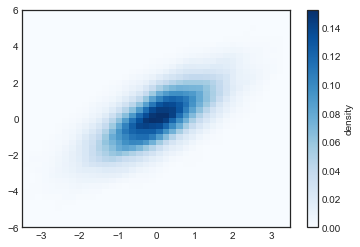

In [15]:
from scipy.stats import gaussian_kde

# 產生和處理數據，初始化KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的網格中計算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 將圖表繪製成一張圖像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

## Example iris

In [16]:
import seaborn as sns
%matplotlib inline

sns.set()
new_iris = sns.load_dataset('input/iris')
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
new_d = pd.Series(np.random.rand(7), index=list('ABCDEFG'))
new_d 

A    0.275502
B    0.717031
C    0.271030
D    0.872355
E    0.090739
F    0.534223
G    0.816215
dtype: float64

<AxesSubplot:>

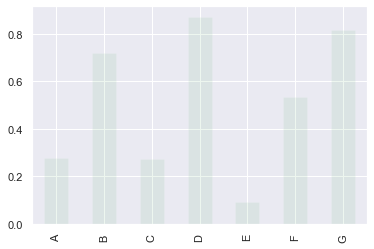

In [18]:
new_d.plot.bar(color='g', alpha=0.1)   #bar
#new_d.plot.barh(color="y", alpha=0.7) #barth

## Example - hotel_review

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

data = pd.read_csv('input/plt-hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [20]:
# lets check the Distribution for the Ratings
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

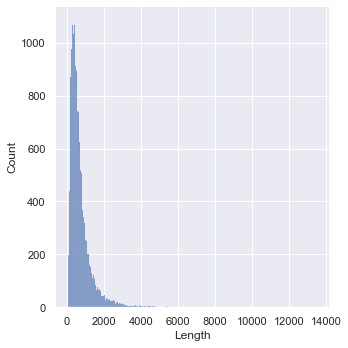

In [21]:
# lets first calculate the Length of the Reviews
data['Length'] = data['Review'].apply(len)
sns.displot(data['Length']) #Distribution of the Length

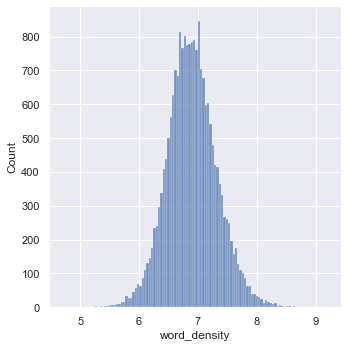

In [22]:
# check the Distribution of Word Density
data['word_count'] = data['Review'].apply(lambda x: len(x.split())) #Word Count
data['word_density'] = data['Length'] / (data['word_count']+1) #Word Density
sns.displot(data['word_density'])

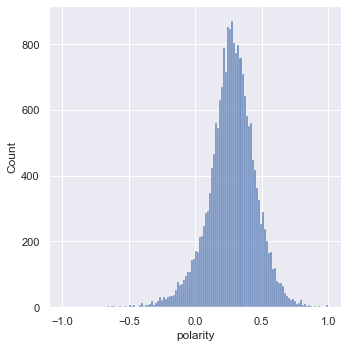

In [23]:
# Lets Calculate the Text Polarity 
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

data['polarity'] = data['Review'].apply(get_polarity)
sns.displot(data['polarity'])

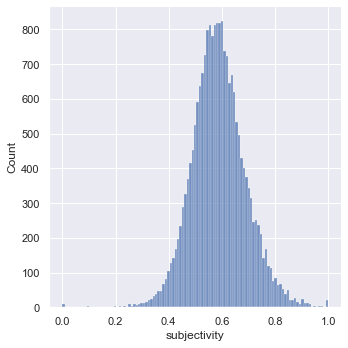

In [24]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

data['subjectivity'] = data['Review'].apply(get_subjectivity)
sns.displot(data['subjectivity'])

## Example - Video Game Sales
- https://www.kaggle.com/gregorut/videogamesales
- https://www.kaggle.com/snanilim/video-games-sales-analysis-and-visualization

In [25]:
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
data = pd.read_excel("input/plt-vgsales.xlsx")

data.isnull().sum()                           #Pandas DataFrame 計算 N/A 出現次數的方法

# 年份的格式錯誤，所以需要更改成整數型態
data['Year'].replace(np.nan, 0, inplace=True) #因為整數沒有 N/A，所以需要先將 N/A 改成 0
data['Year'] = data['Year'].astype('int32')   #改變資料型態
data.head()

#data.shape() #查看資料筆數跟欄位數目 16598 row & 11 col
#data.info()  #檢查資料欄位的型態，以及缺失狀況
#data.describe()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:xlabel='Genre', ylabel='count'>

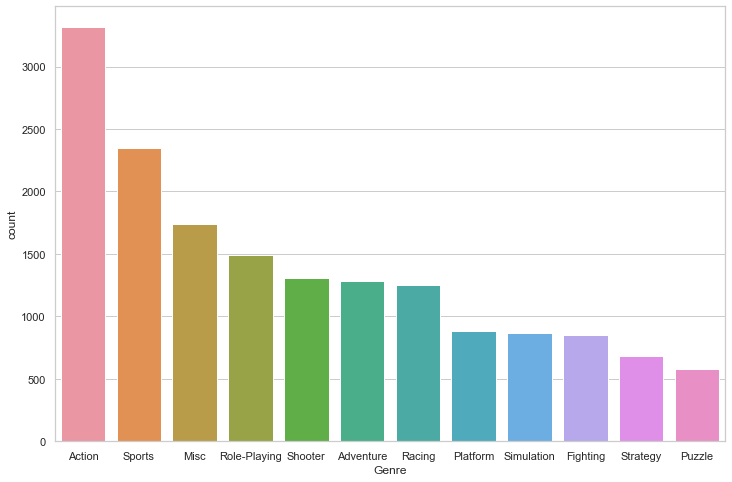

In [26]:
# 最受歡迎的電玩類型 (Genre)
data['Genre'].value_counts()
plt.figure(figsize=(12, 8)) #設定圖表的大小
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index) #排序

<AxesSubplot:xlabel='Year', ylabel='count'>

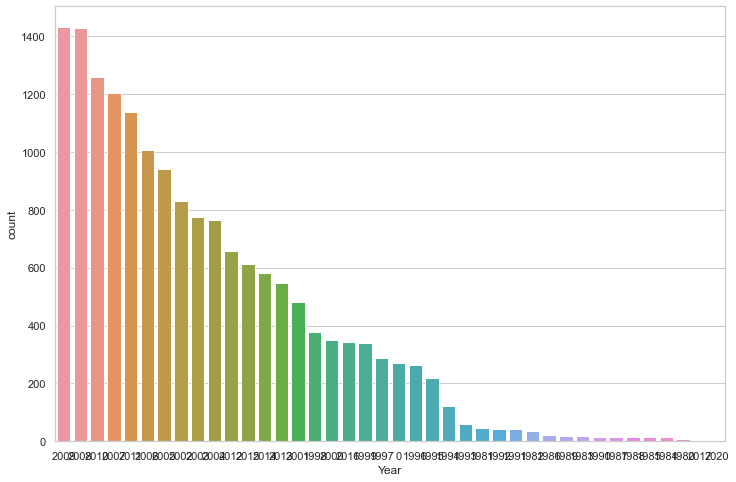

In [27]:
# 哪年發表的遊戲數最多 (Year)
plt.figure(figsize=(12, 8))
sns.countplot(x="Year", data=data, 
              order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
#plt.xticks(rotation=90)

<AxesSubplot:xlabel='Year', ylabel='count'>

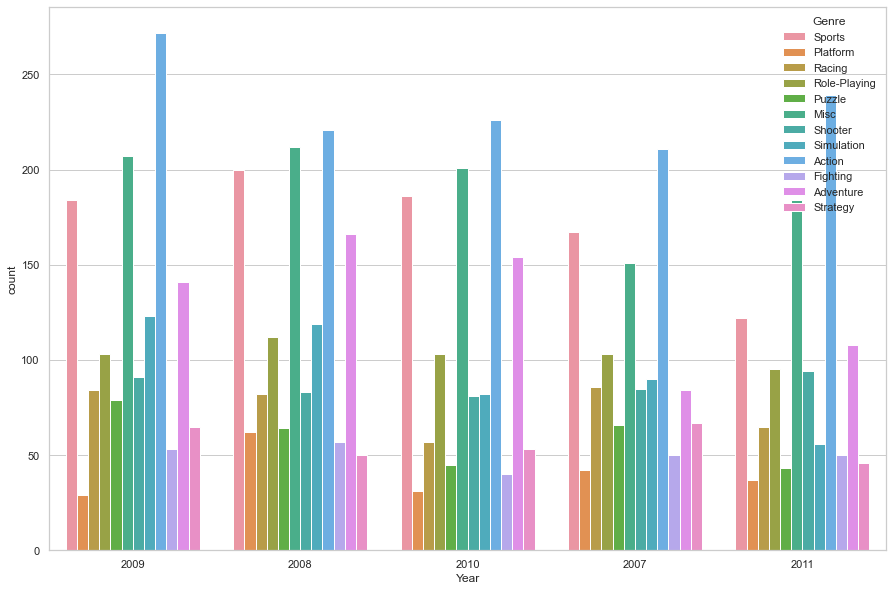

In [28]:
# 銷售最佳前五年，各種類電玩的數目
plt.figure(figsize=(15, 10))
sns.countplot(x="Year",data=data, hue='Genre',
              order=data.Year.value_counts().iloc[:5].index ) #只取出前五名

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

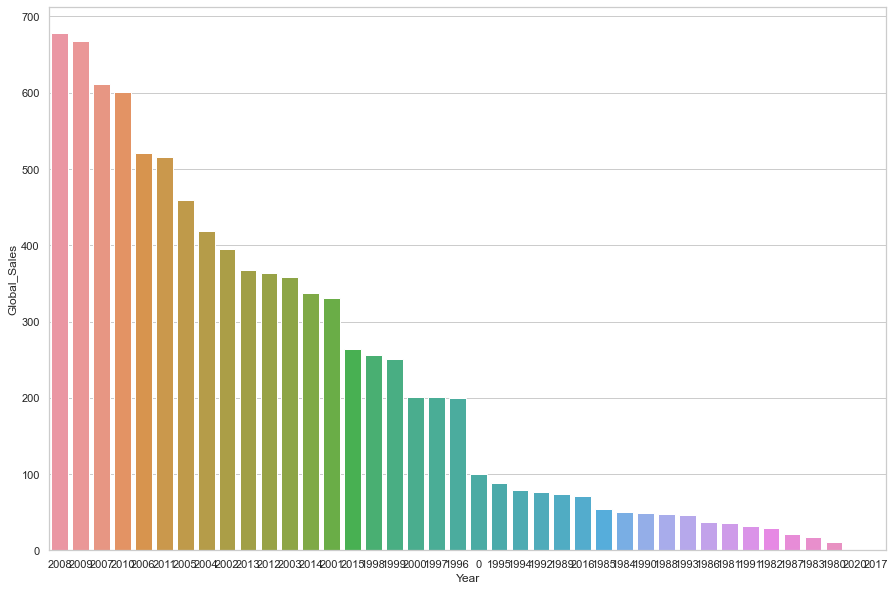

In [29]:
# 計算每一年的全球總銷量
data_year = data.groupby(by=['Year'])['Global_Sales'].sum() 
data_year = data_year.reset_index()  #重設索引變成欄位
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year, 
            order=data_year.sort_values(by='Global_Sales', ascending=False).Year)
#plt.xticks(rotation=90)

### 每年哪個種類的發行數目最多？

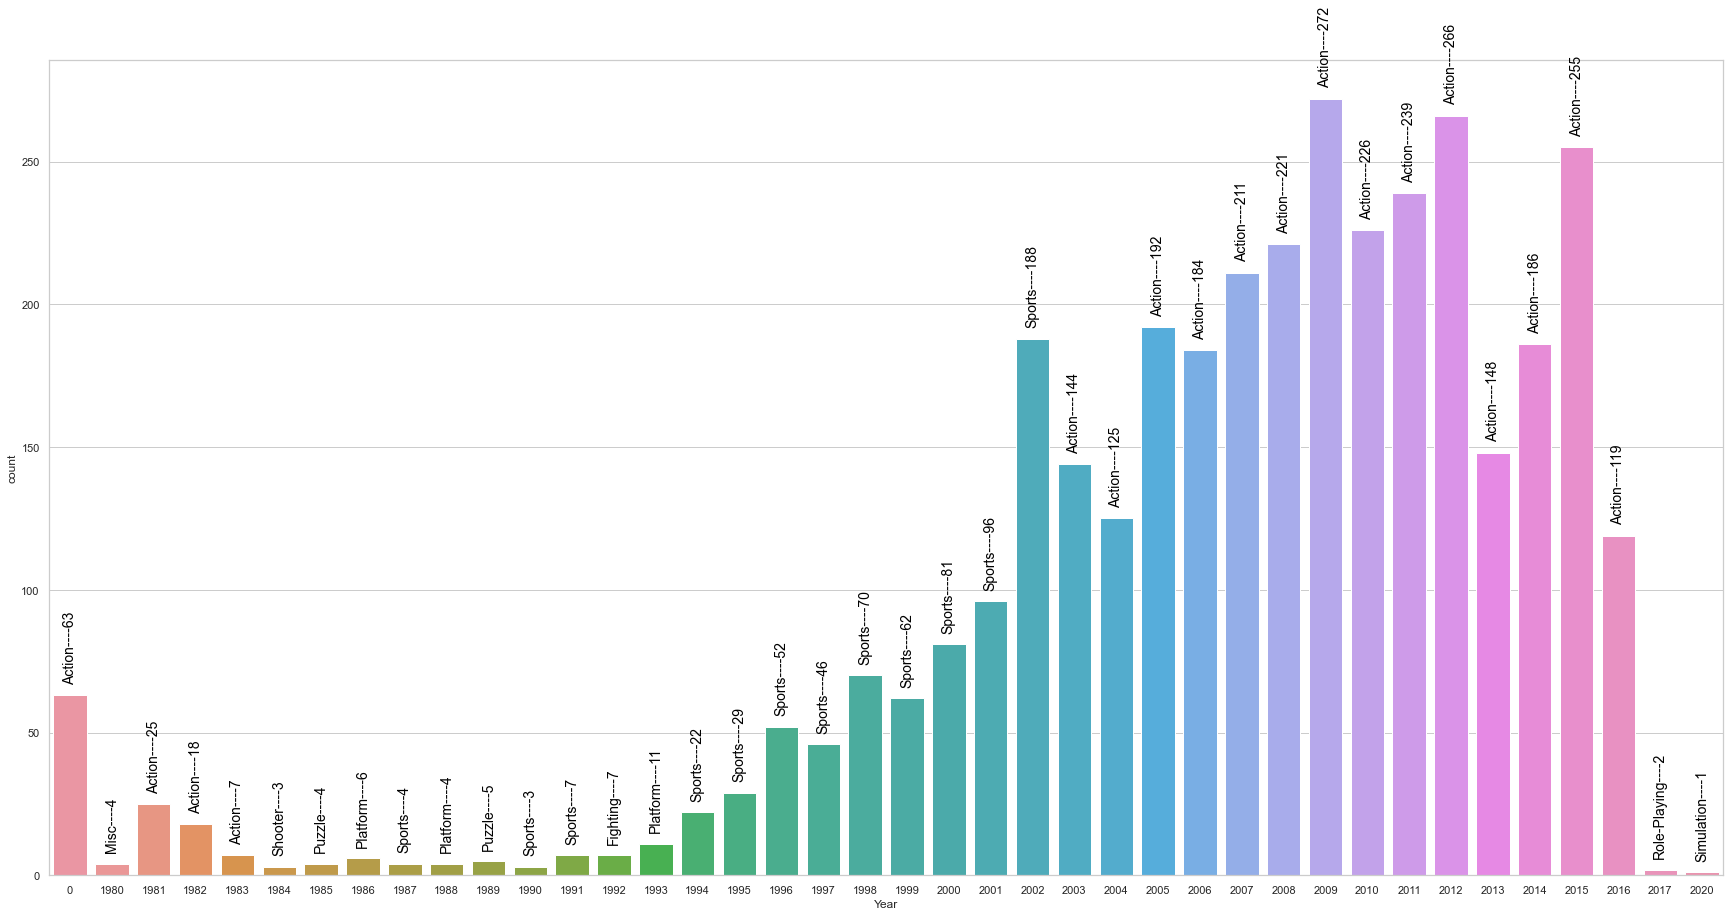

In [30]:
# 每年哪個種類的發行數目最多？
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

#因為每年可能會有不同類型的遊戲發行數目一樣，所以去除重複的
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
year_max_genre.head()

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)

#標示出每個直條代表的類型跟數目
genre = year_max_genre['Genre'].values
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '0'),
  Text(1, 0, '1980'),
  Text(2, 0, '1981'),
  Text(3, 0, '1982'),
  Text(4, 0, '1983'),
  Text(5, 0, '1984'),
  Text(6, 0, '1985'),
  Text(7, 0, '1986'),
  Text(8, 0, '1987'),
  Text(9, 0, '1988'),
  Text(10, 0, '1989'),
  Text(11, 0, '1990'),
  Text(12, 0, '1991'),
  Text(13, 0, '1992'),
  Text(14, 0, '1993'),
  Text(15, 0, '1994'),
  Text(16, 0, '1995'),
  Text(17, 0, '1996'),
  Text(18, 0, '1997'),
  Text(19, 0, '1998'),
  Text(20, 0, '1999'),
  Text(21, 0, '2000'),
  Text(22, 0, '2001'),
  Text(23, 0, '2002'),
  Text(24, 0, '2003'),
  Text(25, 0, '2004'),
  Text(26, 0, '2005'),
  Text(27, 0, '2006'),
  Text(28, 0, '2007'),
  Text(29, 0, '2008'),
  Text(30, 0, '2009'),
  Text(31, 0, '2010'),
  Text(32, 0, '2011'),
  Text(33, 0, '2012'),
  Text(34, 0, '2013'),
  Text(35, 0, '2014'),

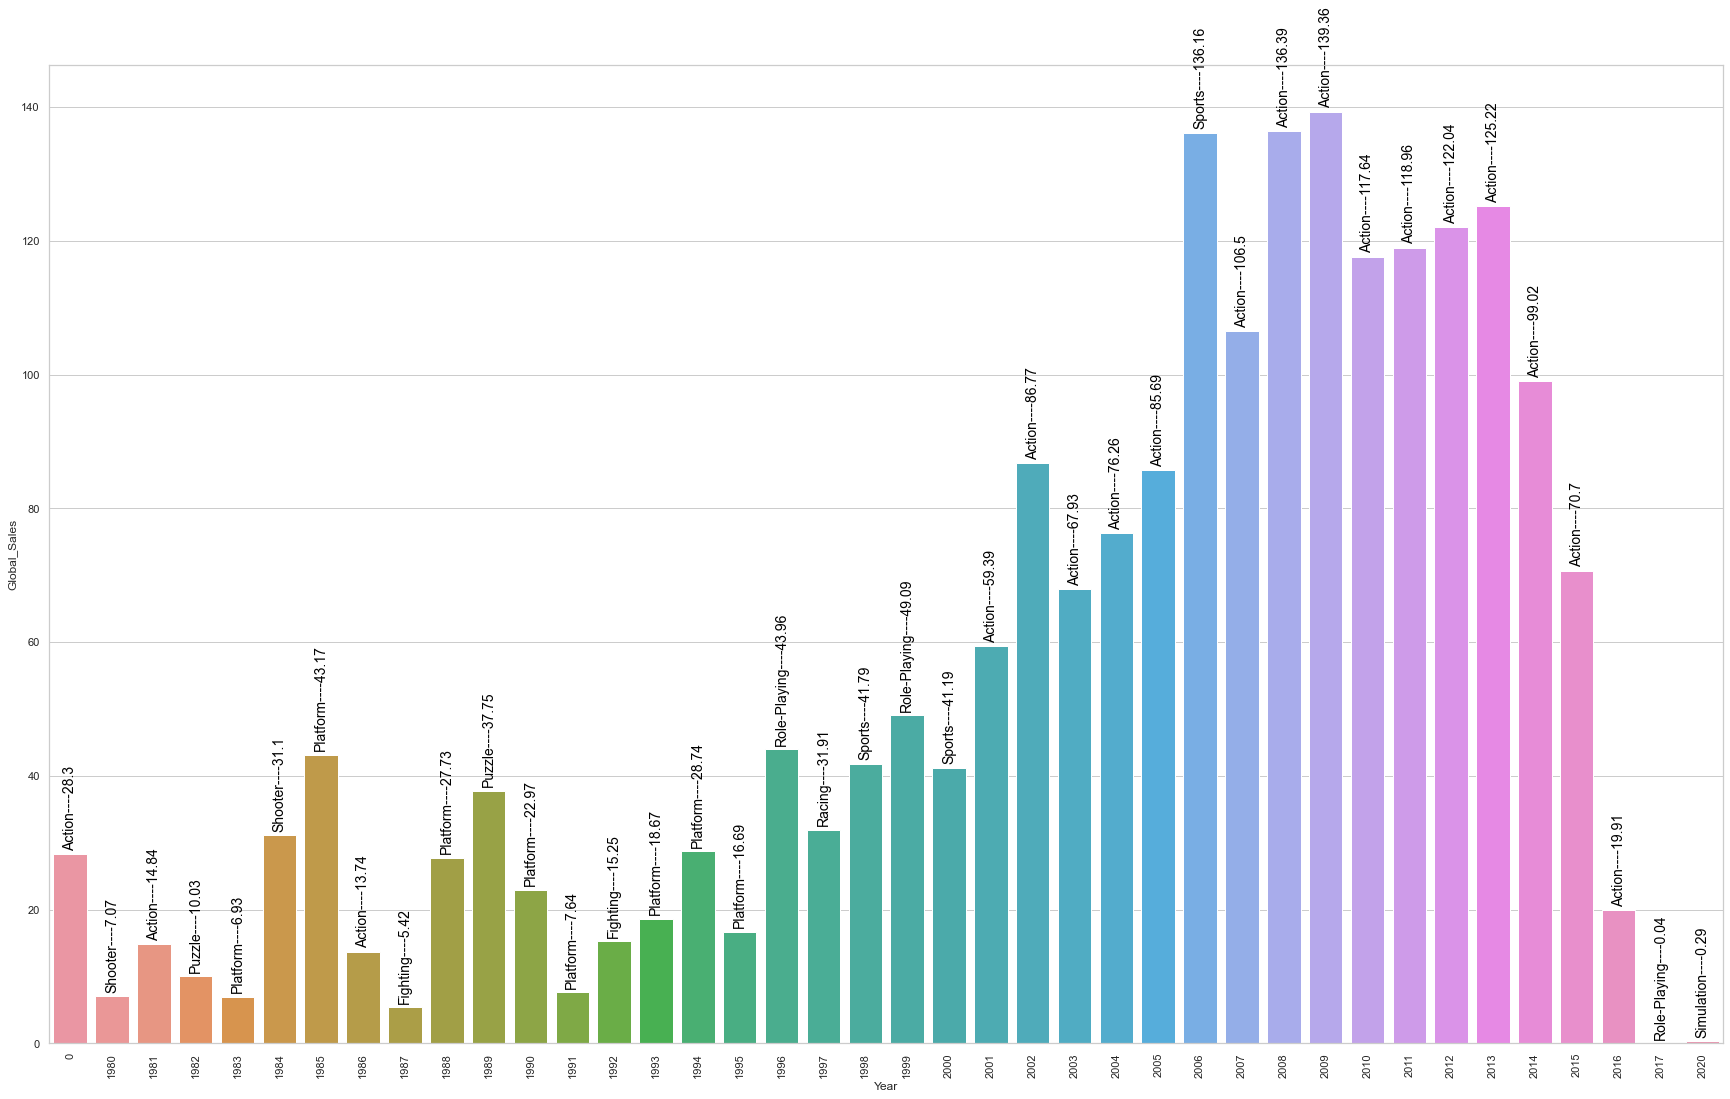

In [31]:
# 每年哪種類型的銷售數量最多？
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)


plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)

genre = year_sale_max['Genre']
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, 
           str(genre[index] + '----' +str(round(value, 2))), # round() 四捨五入到指定的小數位
           color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

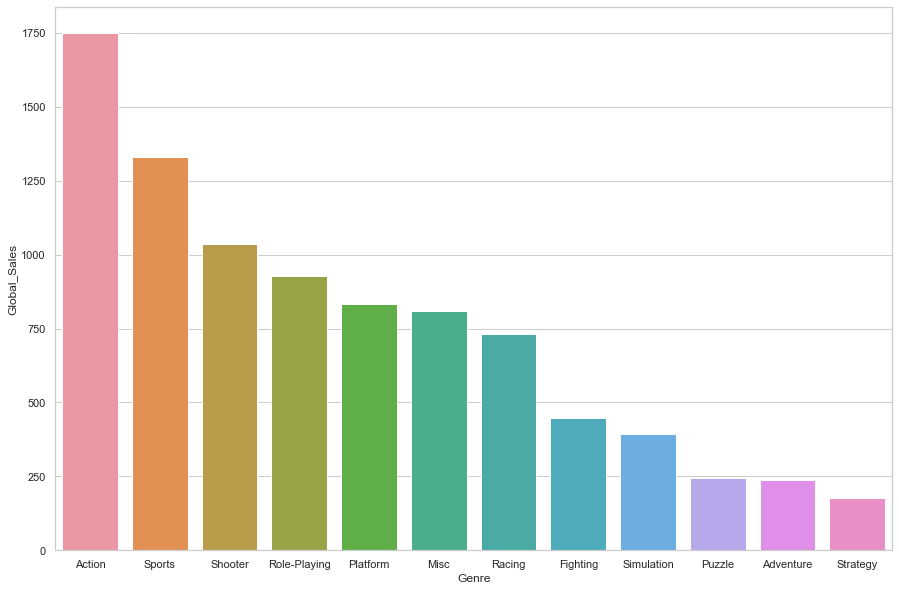

In [32]:
# 哪一種類型銷售總數量最高？
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

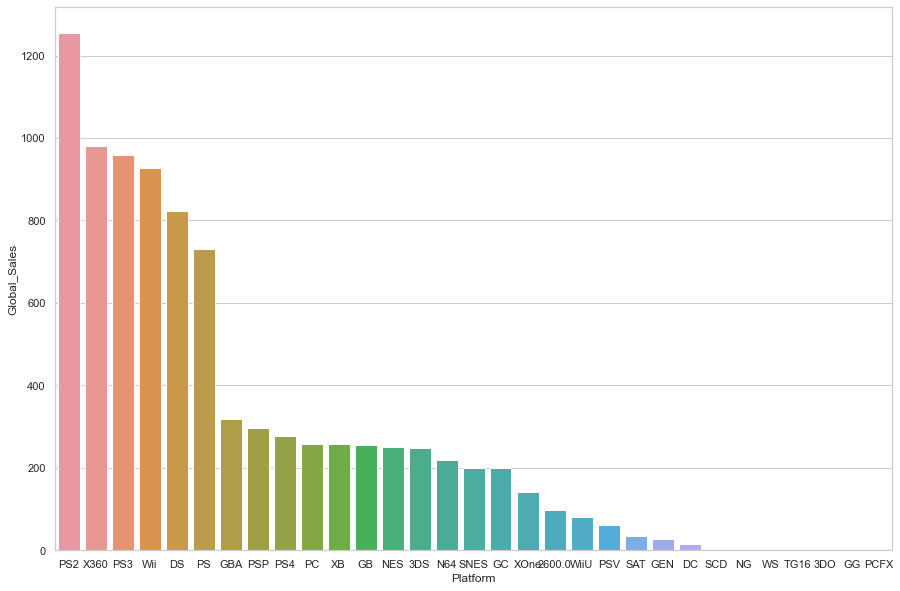

In [33]:
# 哪一個平台的遊戲全球銷售總數量最高？
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)

Text(0.5, 0, 'Release Year')

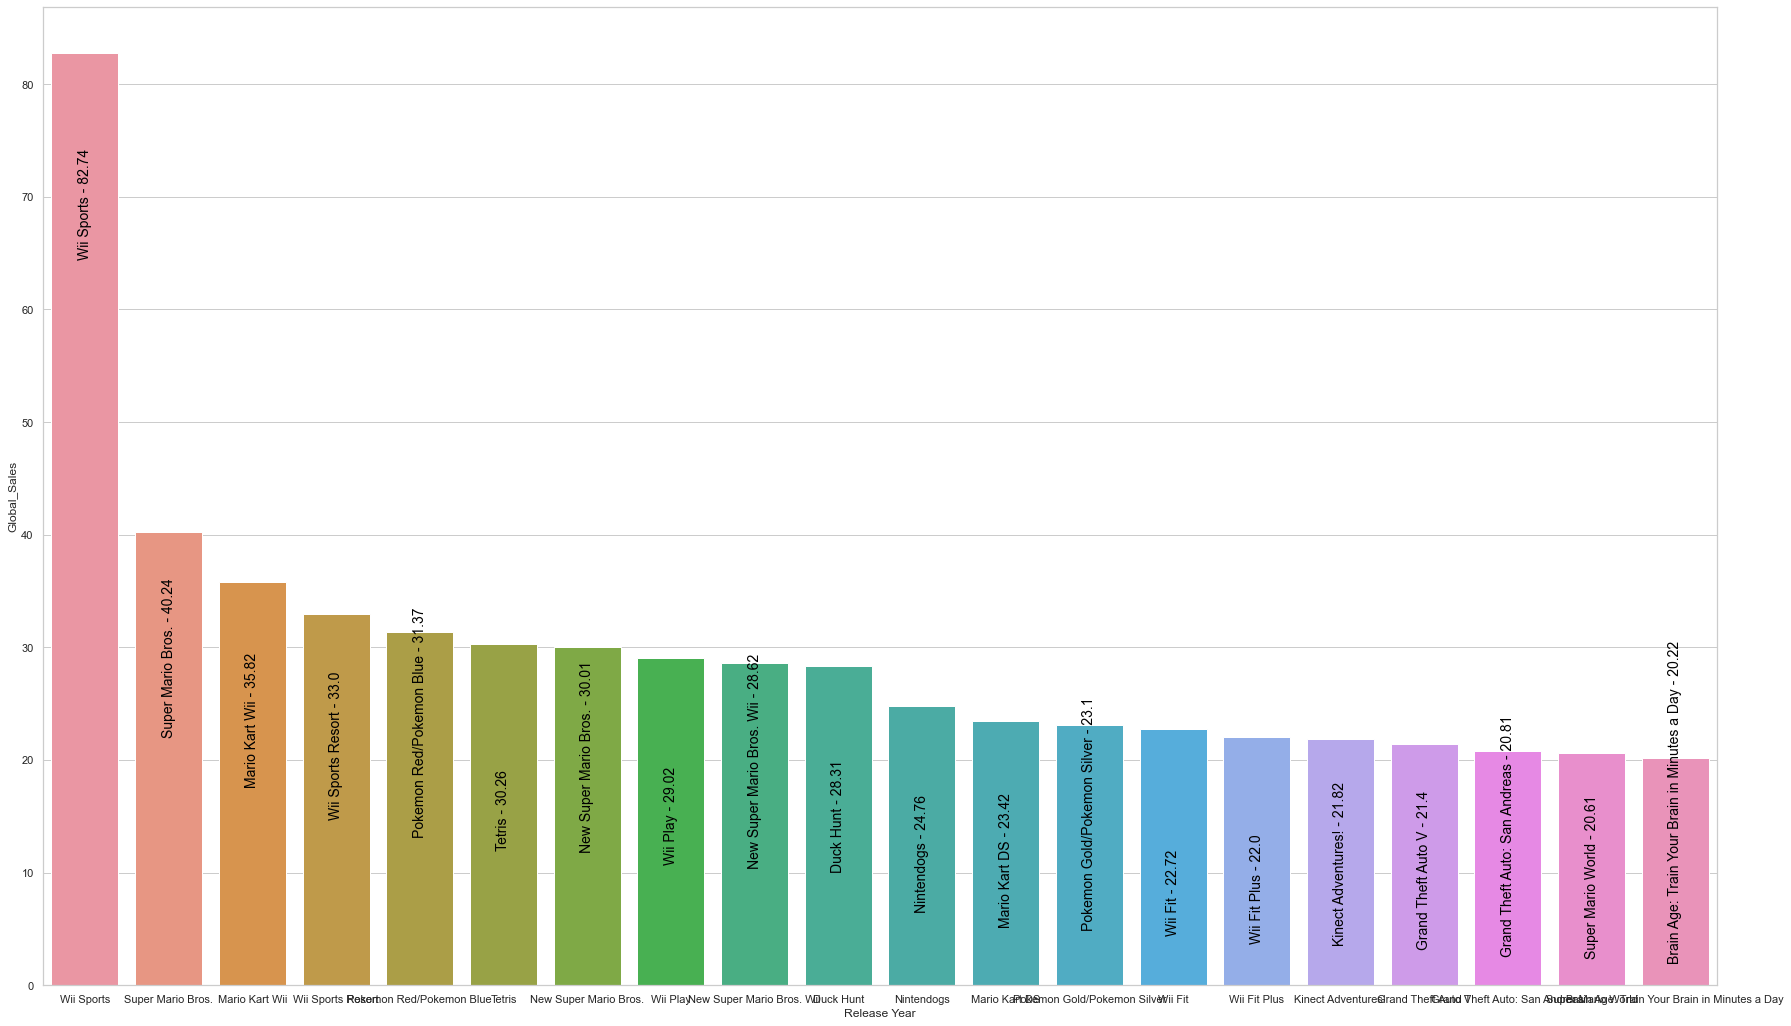

In [34]:
# 全球銷售數量前20大遊戲
top_game_sale = data.head(20) #直接取前20筆
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index]+' - '+str(value), color='#000', size=14, rotation= 90, ha="center")
    index += 1
    
plt.xlabel('Release Year')
#plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
#plt.show()

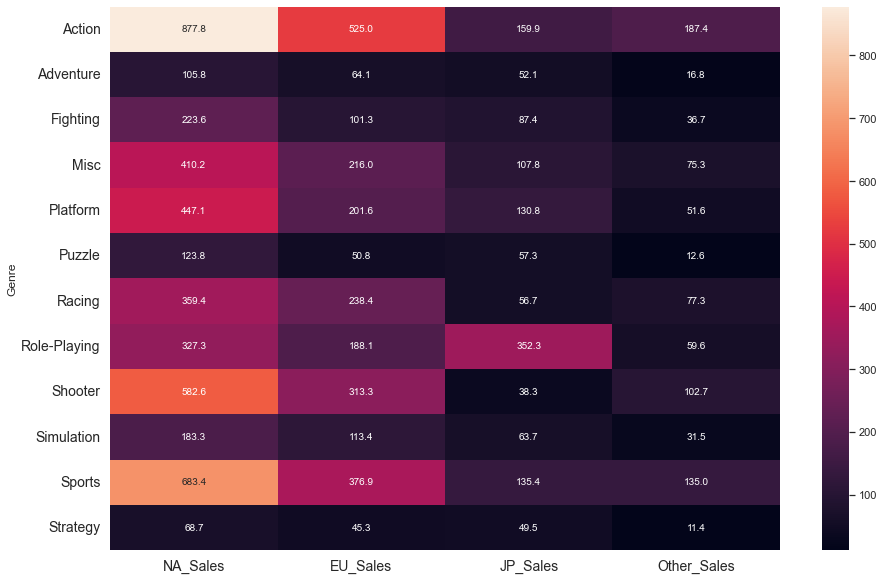

In [35]:
# 比較各區域不同遊戲種類的銷售數量
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.heatmap(comp_map, annot=True, fmt = '.1f') #熱圖
plt.xticks(fontsize=14) #X座標字型
plt.yticks(fontsize=14) #Y座標字型
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, 'Midway Games'),
  Text(19, 0, '505 Games')])

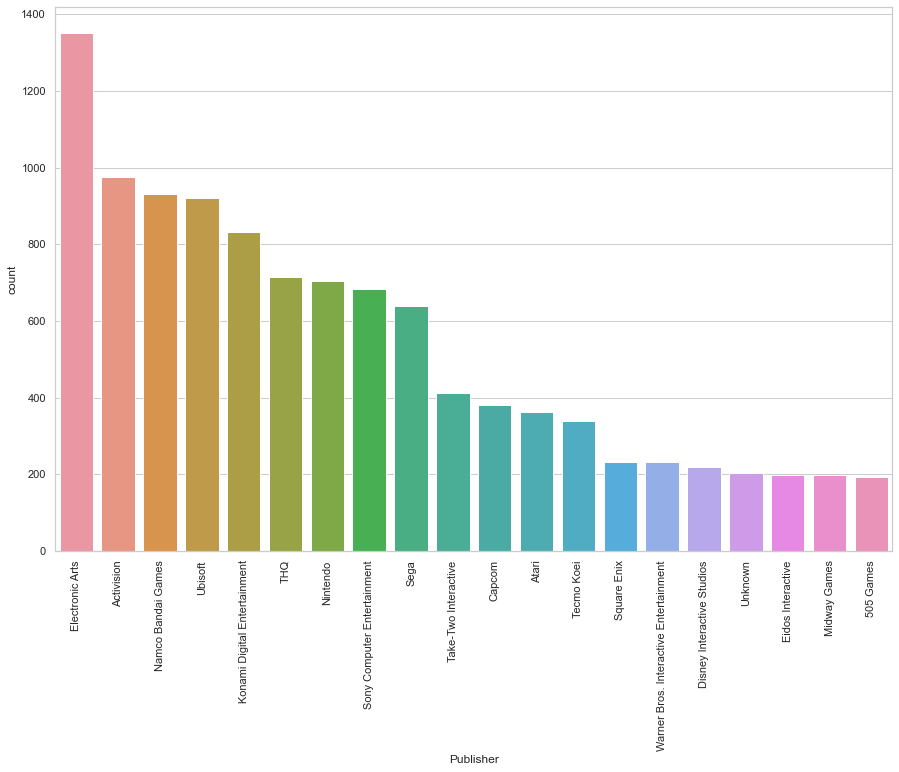

In [36]:
# 列出每個開發商的遊戲數目，與前20大開發商

top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, 
              order = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

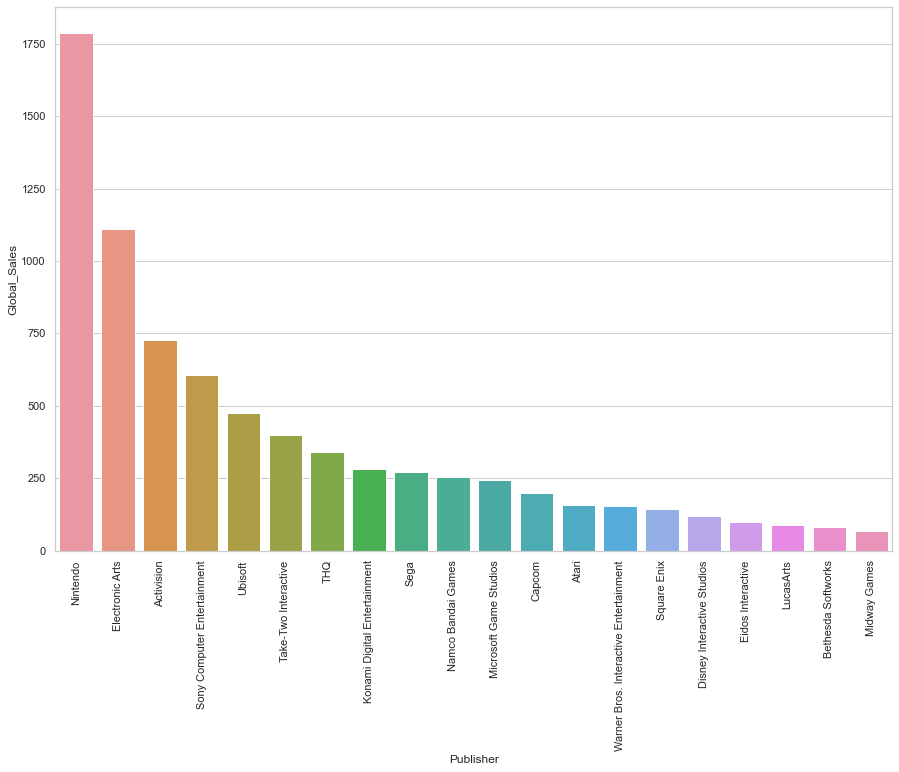

In [37]:
# 各遊戲發行商的全球銷售總數量
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

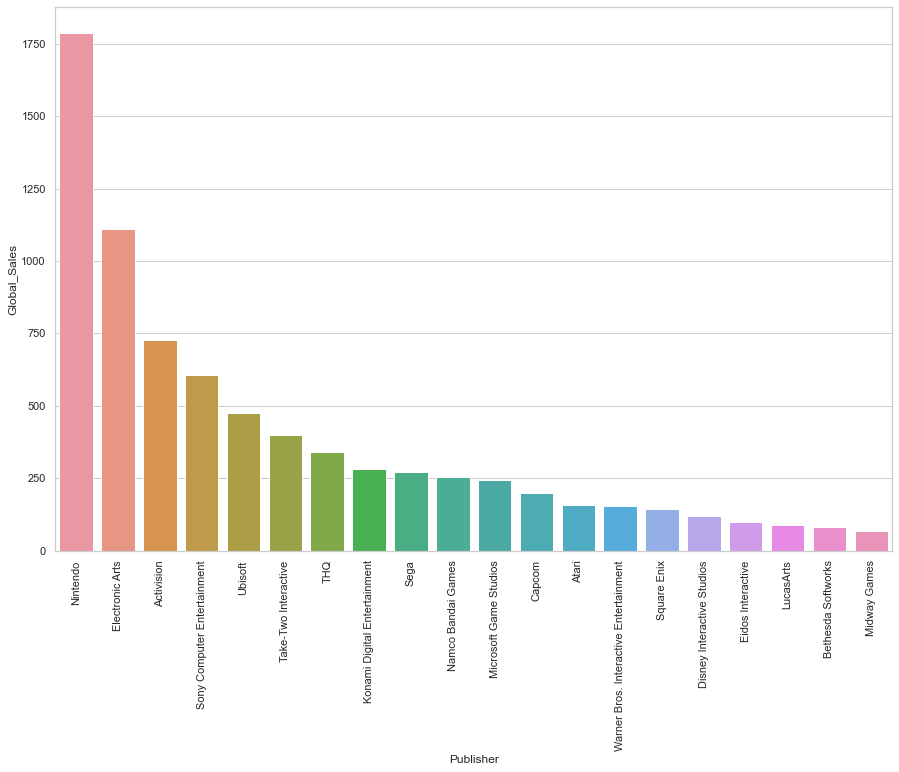

In [38]:
#各遊戲廠商在不同區域的銷售總數量

comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='region', ylabel='sale'>

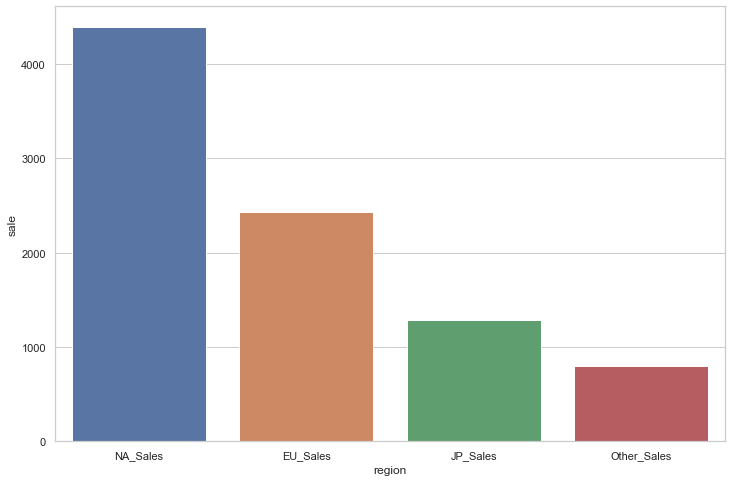

In [40]:
# 各區域遊戲的銷售總量

top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

## <!--NAVIGATION-->
< [密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb) | [目录](Index.ipynb) | [自定义图表图例](04.06-Customizing-Legends.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.05-Histograms-and-Binnings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
